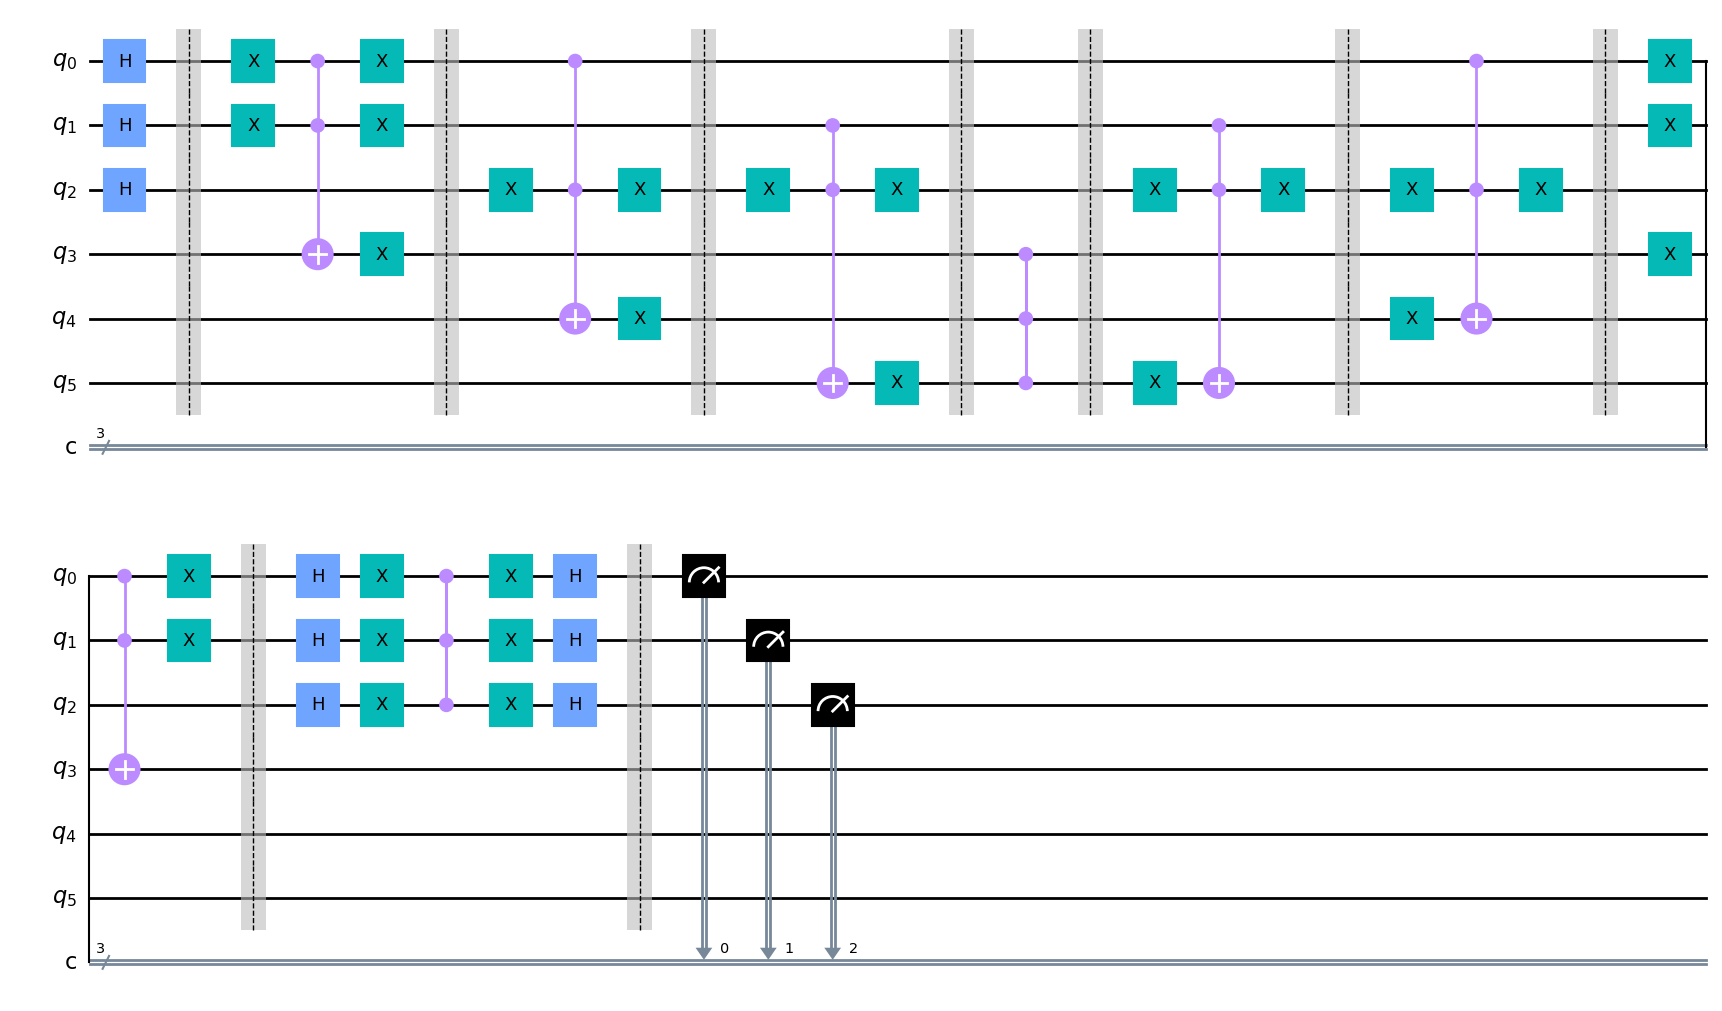

In [2]:
import numpy as np

# Importing standard Qiskit libraries
from qiskit import *
from qiskit.circuit import *
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from qiskit.providers.aer import QasmSimulator
from qiskit.circuit.library.standard_gates import XGate,ZGate,HGate 


# Loading your IBM Quantum account(s)
#provider = IBMQ.load_account()

q_reg = QuantumRegister(6, 'q')
c_reg = ClassicalRegister(3, 'c')
circuit = QuantumCircuit(q_reg, c_reg)


# Qslice 0
circuit.append(HGate(),[q_reg[0]])
circuit.append(HGate(),[q_reg[1]])
circuit.append(HGate(),[q_reg[2]])
circuit.barrier(q_reg)
# Qslice 1
circuit.append(XGate(),[q_reg[0]])
circuit.append(XGate(),[q_reg[1]])
# Qslice 2
circuit.append(XGate().control(2),[q_reg[0], q_reg[1],  q_reg[3]])
# Qslice 3
circuit.append(XGate(),[q_reg[0]])
circuit.append(XGate(),[q_reg[1]])
circuit.append(XGate(),[q_reg[3]])
circuit.barrier(q_reg)
# Qslice 4
circuit.append(XGate(),[q_reg[2]])
# Qslice 5
circuit.append(XGate().control(2),[q_reg[0], q_reg[2],  q_reg[4]])
# Qslice 6
circuit.append(XGate(),[q_reg[2]])
circuit.append(XGate(),[q_reg[4]])
circuit.barrier(q_reg)
# Qslice 7
circuit.append(XGate(),[q_reg[2]])
# Qslice 8
circuit.append(XGate().control(2),[q_reg[1], q_reg[2],  q_reg[5]])
# Qslice 9
circuit.append(XGate(),[q_reg[2]])
circuit.append(XGate(),[q_reg[5]])
circuit.barrier(q_reg)
# Qslice 10
circuit.append(ZGate().control(2),[q_reg[3], q_reg[4],  q_reg[5]])
circuit.barrier(q_reg)
# Qslice 9
circuit.append(XGate(),[q_reg[2]])
circuit.append(XGate(),[q_reg[5]])
# Qslice 8
circuit.append(XGate().control(2),[q_reg[1], q_reg[2],  q_reg[5]])
# Qslice 7
circuit.append(XGate(),[q_reg[2]])
circuit.barrier(q_reg)
# Qslice 6
circuit.append(XGate(),[q_reg[2]])
circuit.append(XGate(),[q_reg[4]])
# Qslice 5
circuit.append(XGate().control(2),[q_reg[0], q_reg[2],  q_reg[4]])
# Qslice 4
circuit.append(XGate(),[q_reg[2]])
circuit.barrier(q_reg)
# Qslice 3
circuit.append(XGate(),[q_reg[0]])
circuit.append(XGate(),[q_reg[1]])
circuit.append(XGate(),[q_reg[3]])
# Qslice 2
circuit.append(XGate().control(2),[q_reg[0], q_reg[1],  q_reg[3]])
# Qslice 1
circuit.append(XGate(),[q_reg[0]])
circuit.append(XGate(),[q_reg[1]])
circuit.barrier(q_reg)
# Qslice 11
circuit.append(HGate(),[q_reg[0]])
circuit.append(HGate(),[q_reg[1]])
circuit.append(HGate(),[q_reg[2]])
# Qslice 12
circuit.append(XGate(),[q_reg[0]])
circuit.append(XGate(),[q_reg[1]])
circuit.append(XGate(),[q_reg[2]])
# Qslice 13
circuit.append(ZGate().control(2),[q_reg[0], q_reg[1],  q_reg[2]])
# Qslice 12
circuit.append(XGate(),[q_reg[0]])
circuit.append(XGate(),[q_reg[1]])
circuit.append(XGate(),[q_reg[2]])
# Qslice 15
circuit.append(HGate(),[q_reg[0]])
circuit.append(HGate(),[q_reg[1]])
circuit.append(HGate(),[q_reg[2]])
circuit.barrier(q_reg)
# Qslice 16
circuit.measure(q_reg[0], c_reg[0])
circuit.measure(q_reg[1], c_reg[1])
circuit.measure(q_reg[2], c_reg[2])

circuit.draw('mpl')

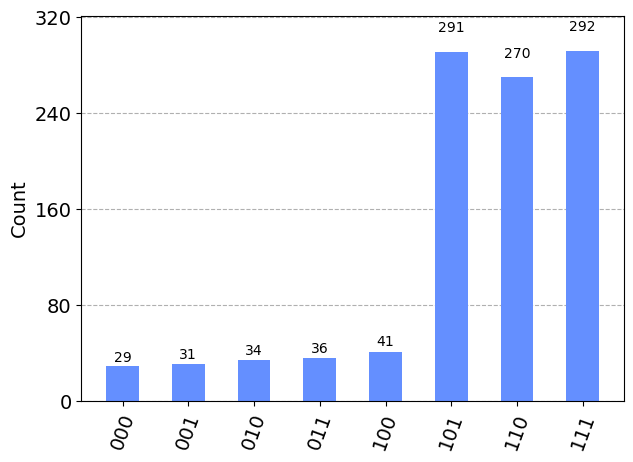

In [3]:
from qiskit import Aer
from qiskit.compiler import transpile
from qiskit.visualization import plot_histogram

# Use Aer's qasm_simulator
backend_sim = Aer.get_backend('qasm_simulator')

# Execute the circuit on the qasm simulator.
# We've set the number of repeats of the circuit
# to be 1024, which is the default.
job_sim = backend_sim.run(transpile(circuit, backend_sim), shots=1024)

# Grab the results from the job.
result_sim = job_sim.result()
counts = result_sim.get_counts(circuit)
plot_histogram(counts)